# Visualizations

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./data/anime_merged.csv')

C:\Users\RAFAEL-PC\AppData\Local\Temp\ipykernel_18956\3393013617.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/anime_merged.csv')


In [8]:
# Drop duplicates for visualization
df_uniques = df.copy()
df_uniques = df_uniques.drop_duplicates(subset='name', keep='first')
df_uniques.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
26773,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,39,-1
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9
47442,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9


### Top Community

In [9]:
df_top_community = df_uniques.nlargest(14, 'members')
df_top_community

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
344257,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,3,10
568937,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229,1,-1
3160071,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,1,10
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
1007976,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796,1,-1
159820,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151,7,9
3277901,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297,1,-1
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9
2127655,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190,4,-1
856697,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817,1,-1


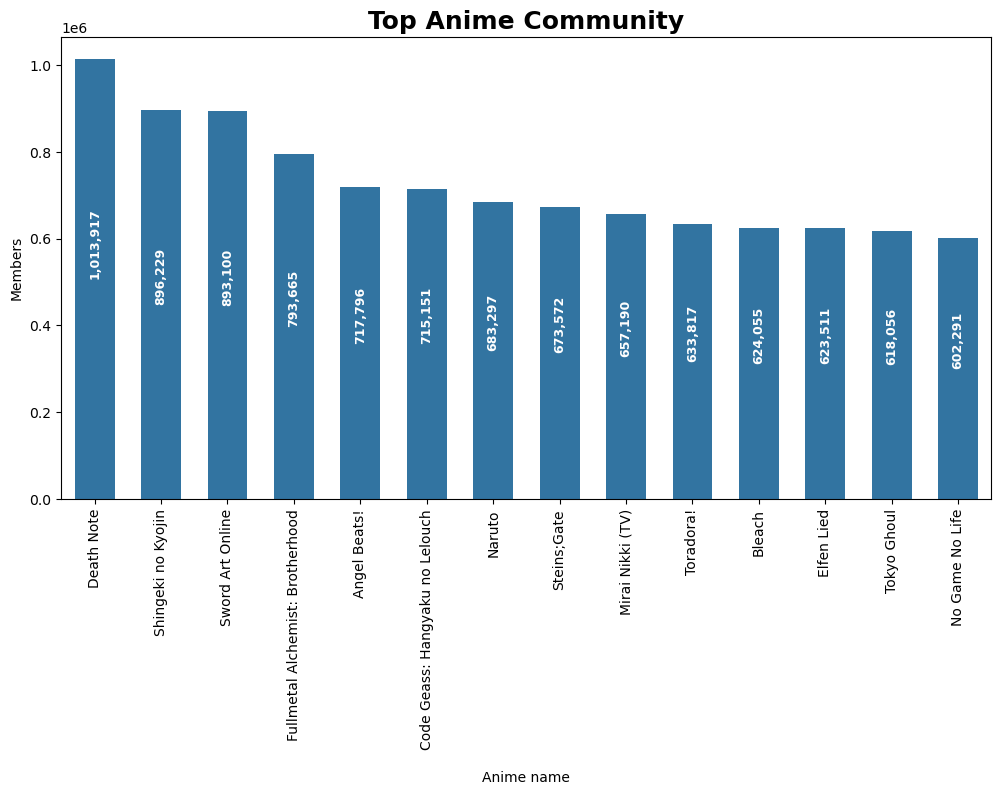

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_top_community, x='name', y='members', width=0.6)

for pos, (i, row) in enumerate(df_top_community.iterrows()):
    plt.text(pos, row['members'] * 0.5, f"{int(row['members']):,}", ha='center', va='bottom', fontsize=9, rotation=90, color='#fff', fontweight='bold')

plt.title('Top Anime Community', fontsize=18, fontweight='bold')
plt.xlabel('\nAnime name')
plt.ylabel('Members')
plt.xticks(rotation=90)
plt.show()

### Categories

In [11]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'user_id', 'user_rating'],
      dtype='object')

In [12]:
df_categories = df_uniques['type'].value_counts()

In [13]:
df_categories.index

Index(['TV', 'OVA', 'Movie', 'Special', 'ONA', 'Music'], dtype='object', name='type')

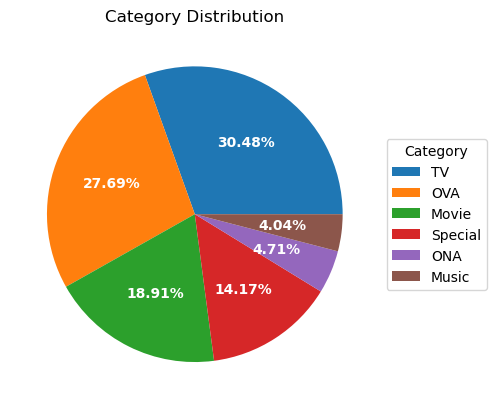

In [14]:
wedges, _, autotexts = plt.pie(df_categories, autopct='%.2f%%')

# Agregar la leyenda con las categorías
plt.legend(
    wedges,
    df_categories.index,
    title="Category",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# change percentage styles
for autotext in autotexts:
    autotext.set_color('#fff')
    autotext.set_fontweight('bold')

plt.title('Category Distribution')
plt.show()

## Animes per Category

In [15]:
df_animes_per_cat = df_uniques.groupby('type')['name'].count().sort_values(ascending=False)
df_animes_per_cat

type
TV         3402
OVA        3090
Movie      2111
Special    1581
ONA         526
Music       451
Name: name, dtype: int64

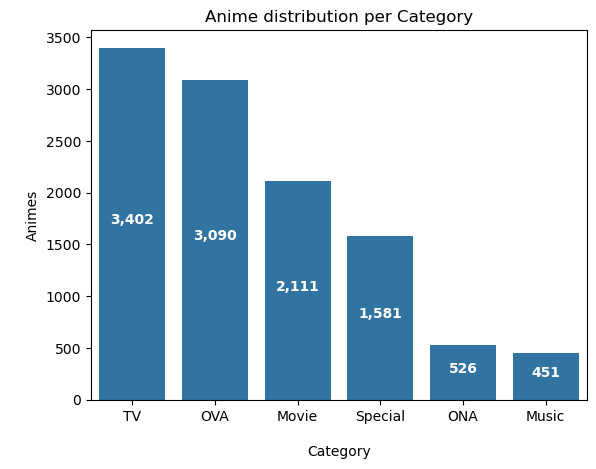

In [16]:
sns.barplot(data=df_animes_per_cat)

for index in df_animes_per_cat.index:
    plt.text(index, df_animes_per_cat[index] * 0.5, f"{int(df_animes_per_cat[index]):,}", ha='center', color='#fff', fontweight='bold')

plt.title('Anime distribution per Category')
plt.xlabel('\nCategory')
plt.ylabel('\nAnimes')
plt.show()

# Overall ratings

In [17]:
df_uniques['rating']

0          9.37
2199       9.26
26773      9.25
28159      9.17
47442      9.16
           ... 
7813593    4.15
7813597    4.28
7813601    4.88
7813604    4.98
7813608    5.46
Name: rating, Length: 11161, dtype: float64

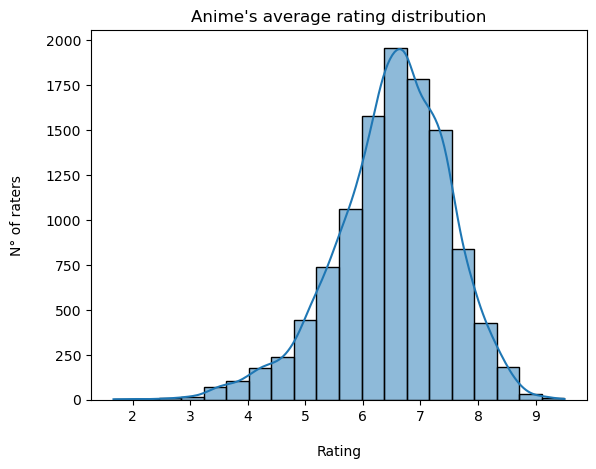

In [18]:
sns.histplot(data=df_uniques, x='rating', kde=True, bins=20)

plt.title("Anime's average rating distribution")
plt.xlabel('\nRating')
plt.ylabel('N° of raters\n')
plt.show()

### User's anime ratings distribution

In [19]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'user_id', 'user_rating'],
      dtype='object')

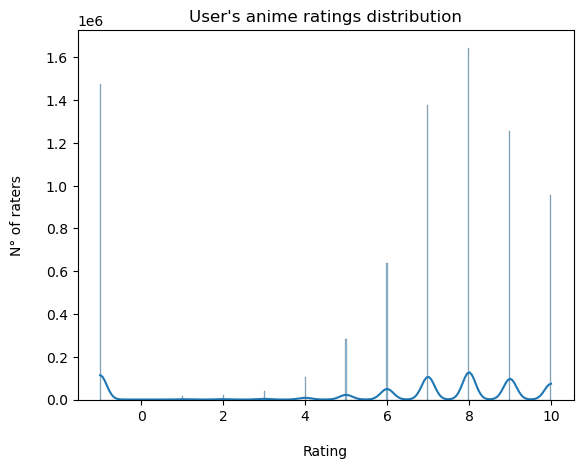

In [20]:
sns.histplot(data=df, x='user_rating', kde=True)

plt.title("User's anime ratings distribution")
plt.xlabel('\nRating')
plt.ylabel('N° of raters\n')
plt.show()

## Top animes based on ratings

In [21]:
df_top_by_rating = df_uniques.nlargest(14, 'rating').set_index('name', drop=False)
df_top_by_rating

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
name,,,,,,,,,
Mogura no Motoro,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62,48766,-1
Kimi no Na wa.,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
Fullmetal Alchemist: Brotherhood,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
Gintama°,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,39,-1
Yakusoku: Africa Mizu to Midori,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53,48766,-1
Steins;Gate,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9
Gintama&#039;,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,17,9
Hunter x Hunter (2011),11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,7,9


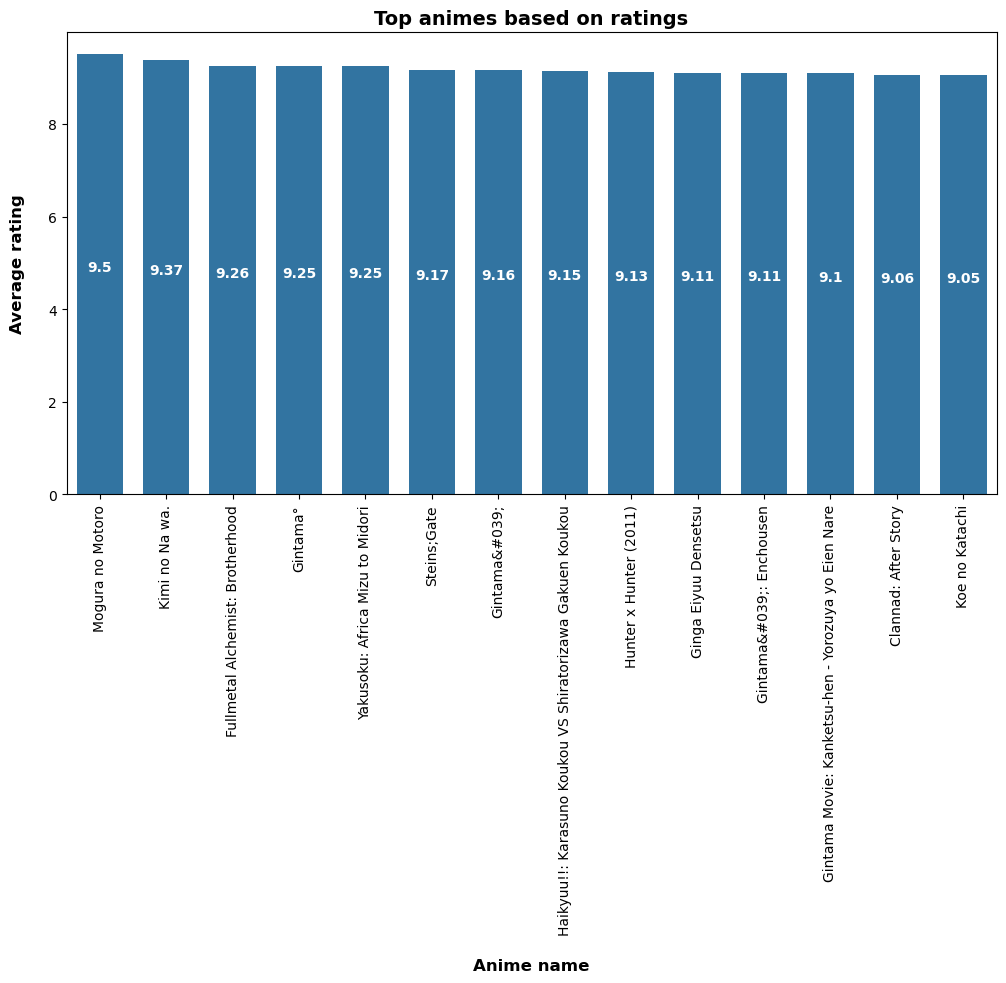

In [22]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_top_by_rating, x='name', y='rating', width=0.7)

for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, height * 0.5, f"{height:,}", ha='center', va='bottom', fontsize=10, color='#fff', fontweight='bold')

plt.xticks(rotation=90)
plt.title('Top animes based on ratings', fontweight='bold', fontsize='14')
plt.xlabel('\nAnime name', fontweight='semibold', fontsize='12')
plt.ylabel('Average rating\n', fontweight='semibold', fontsize='12')
plt.show()

## Category-wise Anime Ratings Distribution

In [23]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'user_id', 'user_rating'],
      dtype='object')

In [24]:
df.drop_duplicates(subset=['name']).nunique()

anime_id       11161
name           11161
genre           3154
type               6
episodes         274
rating           585
members         6483
user_id         1672
user_rating       11
dtype: int64

In [ ]:
def plot_cat_rate_distribution(user_cat_df, cat_name):

    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    axes = axes.flatten()
    
    anime_df = user_cat_df.drop_duplicates(subset=['name'])

    # anime rating
    sns.histplot(data=anime_df, x='rating', kde=True, bins=20, ax=axes[0])
    
    axes[0].set_title(f"Anime's average rating distribution [Category]: {cat_name}")
    # plt.title(f"Anime's average rating distribution [Category]: {cat_name}")
    # plt.xlabel('\nRating')
    # plt.ylabel('N° of raters\n')
    # plt.show()

    sns.histplot(data=user_cat_df, x='user_rating', kde=True, ax=axes[1])

    axes[1].set_title(f"User's anime ratings distribution [Category]: {cat_name}")
    # plt.title(f"User's anime ratings distribution [Category]: {cat_name}")
    # plt.xlabel('\nRating')
    # plt.ylabel('N° of raters\n')
    plt.show()

In [26]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'user_id', 'user_rating'],
      dtype='object')

In [27]:
df['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

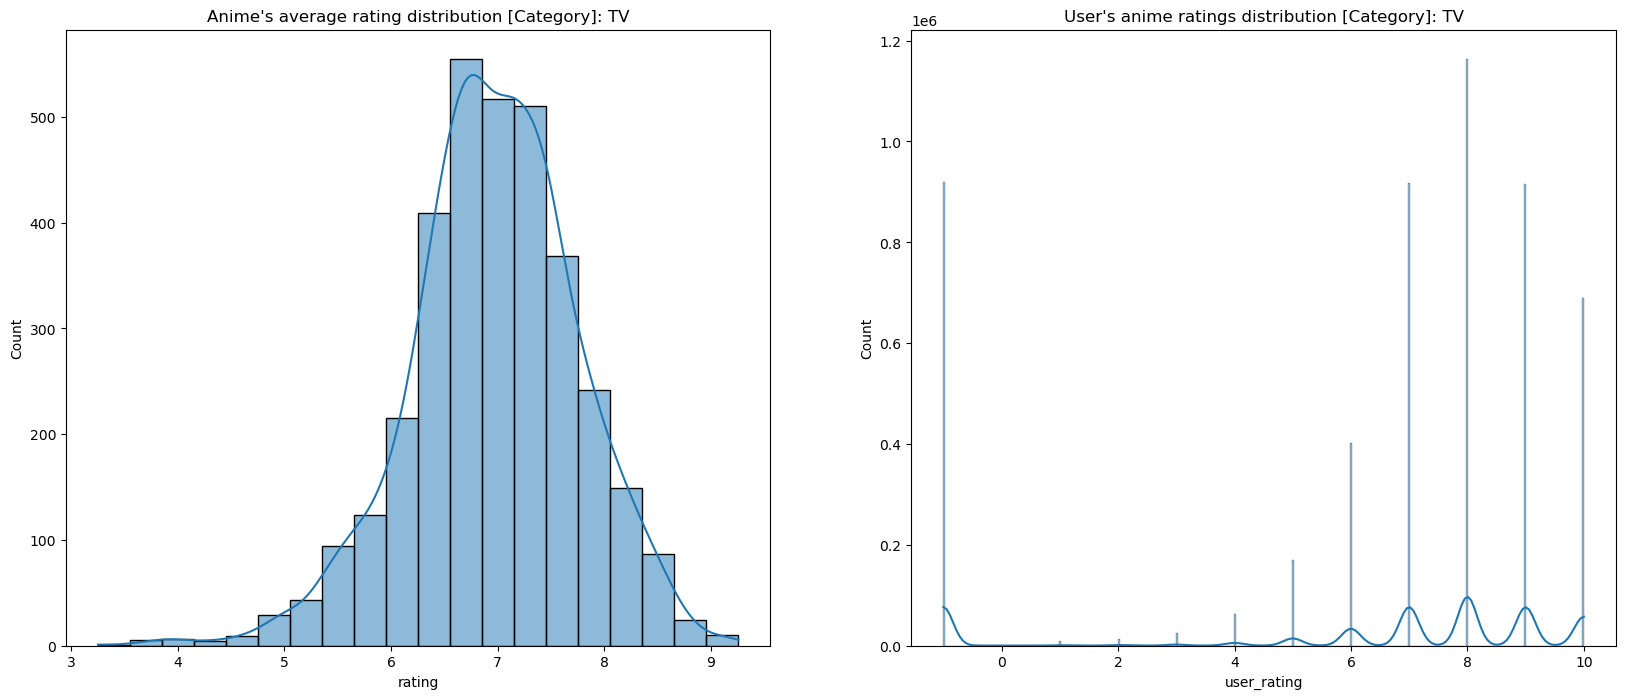

In [28]:
plot_cat_rate_distribution(df[df['type'] == 'TV'], 'TV')

In [29]:
df['type'] == 'Movie'

0           True
1           True
2           True
3           True
4           True
           ...  
7813605    False
7813606    False
7813607    False
7813608     True
7813609     True
Name: type, Length: 7813610, dtype: bool

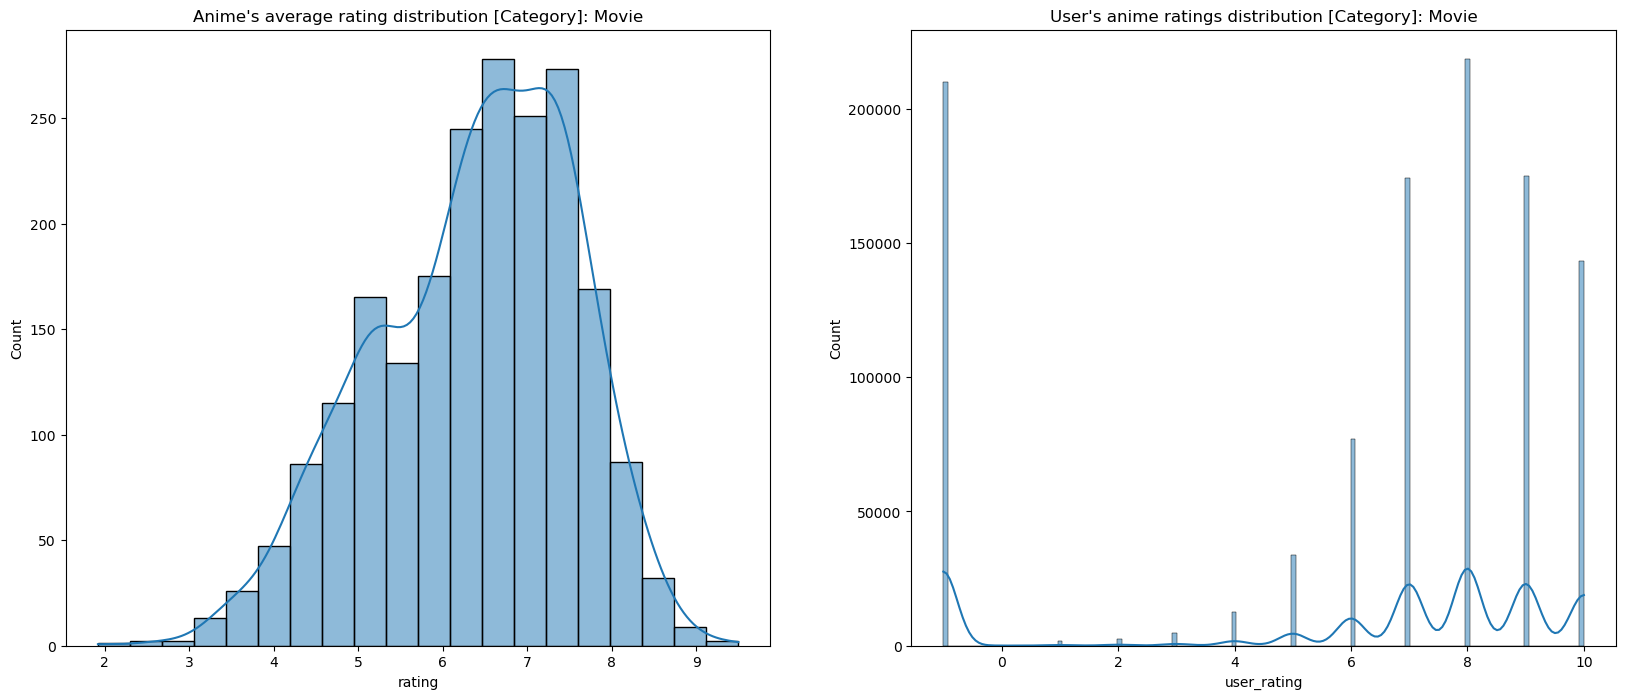

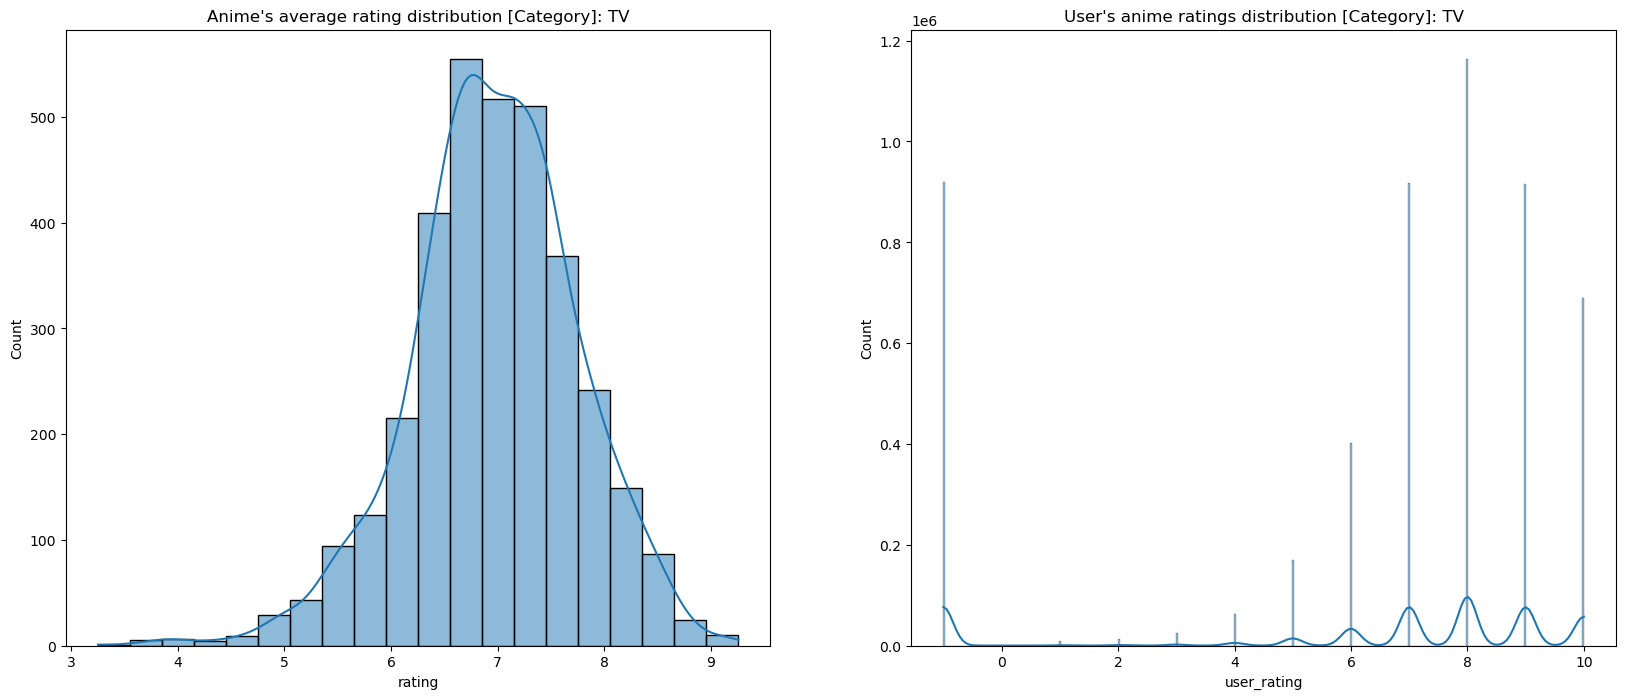

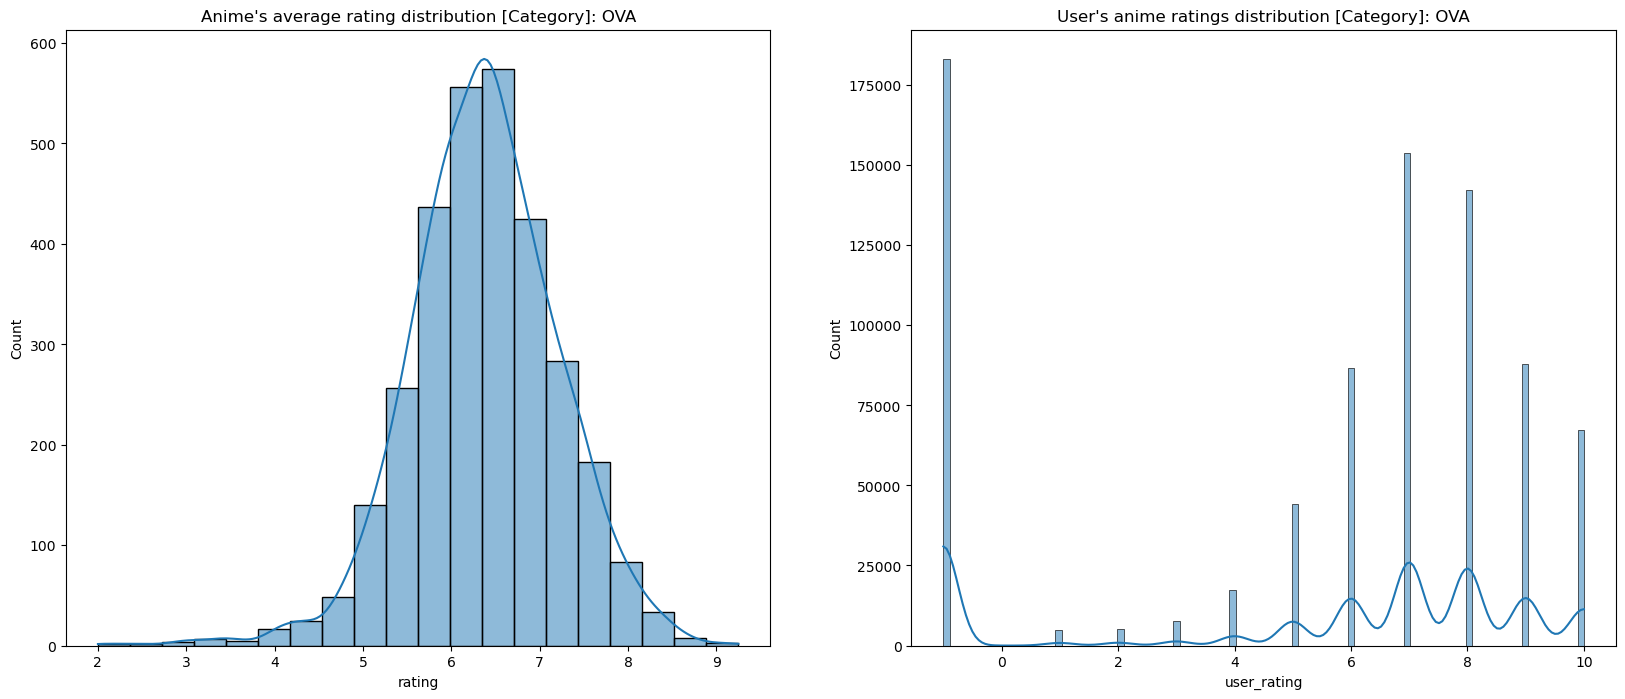

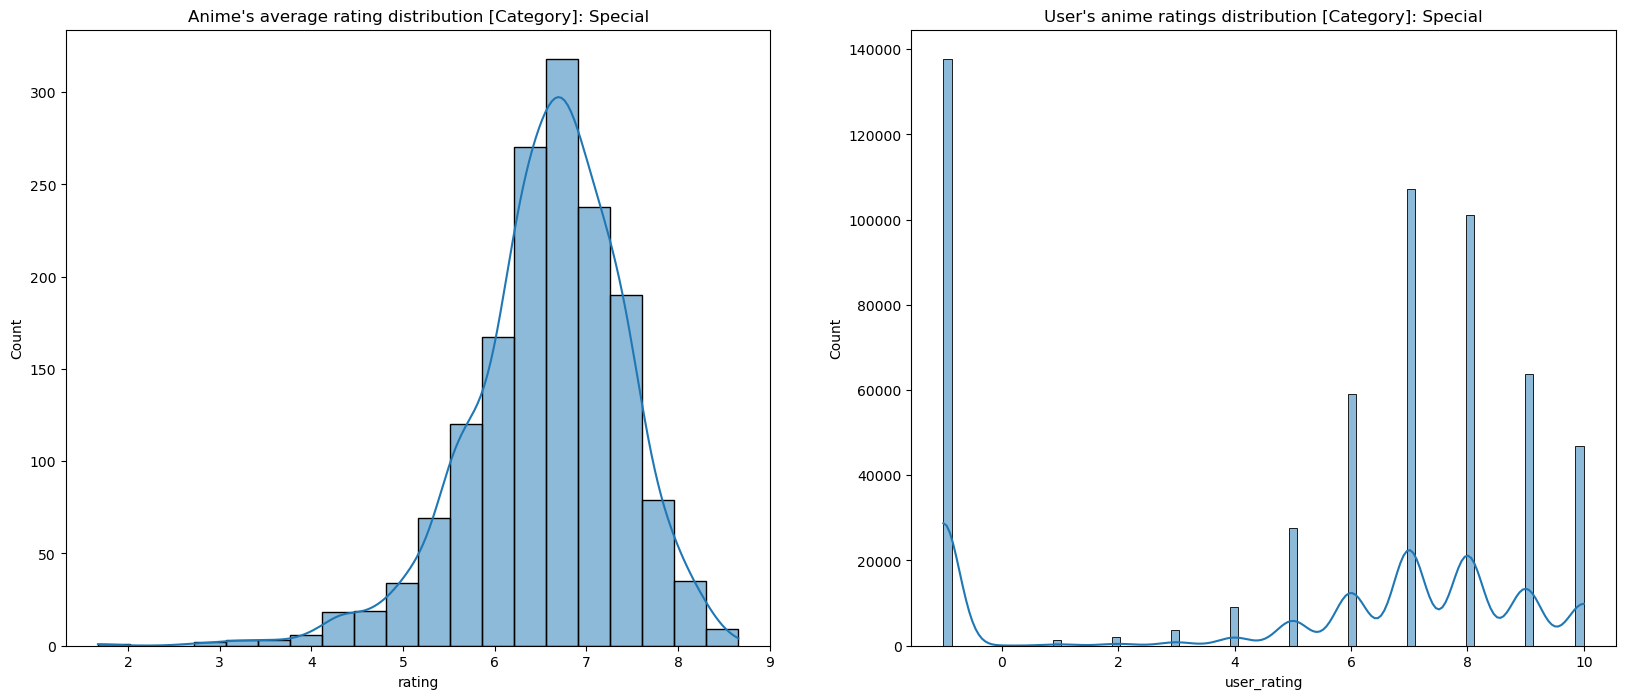

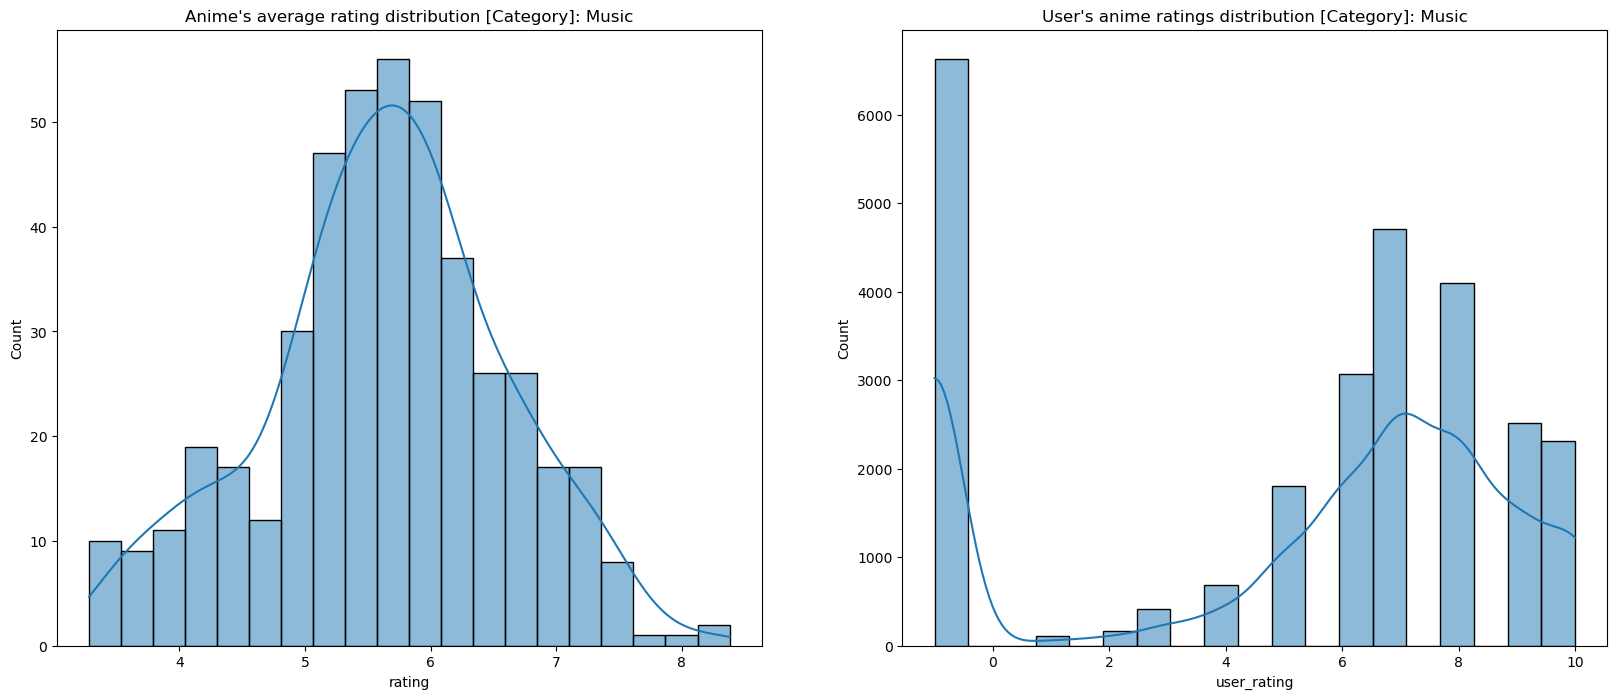

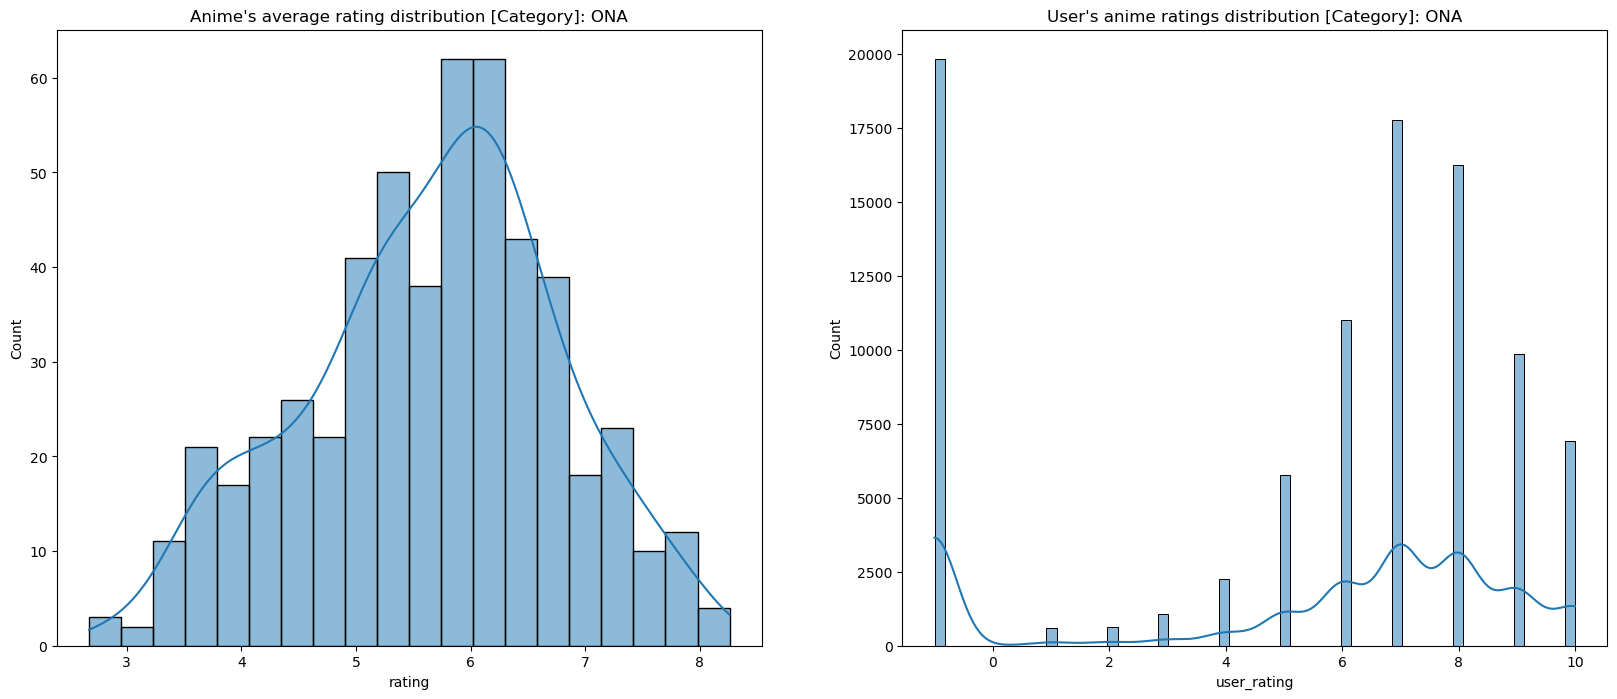

In [30]:
for col in df['type'].unique():
    plot_cat_rate_distribution(df[df['type'] == col], col)

## Anime Genres

In [31]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'user_id', 'user_rating'],
      dtype='object')

In [32]:
df.loc[~df['genre'].str.contains(','), 'genre'].unique()

array(['Drama', 'Fantasy', 'Music', 'Action', 'Comedy', 'Mystery',
       'Shounen', 'Dementia', 'Martial Arts', 'Sci-Fi', 'Adventure',
       'Ecchi', 'Sports', 'Slice of Life', 'Kids', 'Magic', 'School',
       'Romance', 'Shoujo', 'Game', 'Historical', 'Mecha',
       'Psychological', 'Parody', 'Horror', 'Thriller', 'Harem',
       'Supernatural', 'Cars', 'Samurai', 'Military', 'Vampire', 'Demons',
       'Seinen', 'Hentai', 'Yaoi'], dtype=object)

In [33]:
df['genre'].value_counts()

genre
Hentai                                       62435
Comedy, School, Slice of Life                61404
Comedy                                       54154
Comedy, Slice of Life                        52569
Action, Adventure, Fantasy, Game, Romance    50051
                                             ...  
Action, School                                   1
Romance, Shoujo, Sports                          1
Adventure, Drama, Kids, Supernatural             1
Action, Game, Kids                               1
Historical, Kids, Music                          1
Name: count, Length: 3154, dtype: int64

In [34]:
# get unique genres

splitted_genre_df = df_uniques['genre'].str.split(', ')
sploded_genre_df = splitted_genre_df.explode()
unique_genres = sploded_genre_df.unique()
unique_genres

array(['Drama', 'Romance', 'School', 'Supernatural', 'Action',
       'Adventure', 'Fantasy', 'Magic', 'Military', 'Shounen', 'Comedy',
       'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Thriller', 'Sports',
       'Super Power', 'Space', 'Slice of Life', 'Mecha', 'Music',
       'Mystery', 'Seinen', 'Martial Arts', 'Vampire', 'Shoujo', 'Horror',
       'Police', 'Psychological', 'Demons', 'Ecchi', 'Josei',
       'Shounen Ai', 'Game', 'Dementia', 'Harem', 'Cars', 'Kids',
       'Shoujo Ai', 'Hentai', 'Yaoi', 'Yuri'], dtype=object)

In [35]:
unique_genres.shape

(43,)

In [36]:
#genre ocurrences
sploded_genre_df.value_counts().reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
genre,Comedy,Action,Adventure,Fantasy,Sci-Fi,Drama,Shounen,Romance,Kids,School,...,Game,Samurai,Vampire,Thriller,Cars,Shounen Ai,Shoujo Ai,Josei,Yuri,Yaoi
count,4271,2686,2197,2107,1981,1857,1636,1420,1306,1135,...,161,142,97,84,65,61,54,52,41,37


## Wordcloud

In [37]:
sploded_genre_df.str.lower().str.strip().str.replace(r'[^\w\s]', '', regex=True)

0                 drama
0               romance
0                school
0          supernatural
2199             action
               ...     
7813593          hentai
7813597          hentai
7813601          hentai
7813604          hentai
7813608          hentai
Name: genre, Length: 33723, dtype: object

In [38]:
sploded_genre_df.sample(10)

7689643        Drama
7780844       Demons
5030182    Shoujo Ai
7797299       Demons
4384335       Seinen
7102208       Action
6076192      Fantasy
5714583       School
7017312        Mecha
6620429      Fantasy
Name: genre, dtype: object

In [39]:
from collections import Counter

genres_cleaned = sploded_genre_df.str.replace('Slice of Life', 'Slice_of_Life')
genres_cleaned_2 = genres_cleaned.str.lower().str.strip().str.replace(r'[^\w\s]', '', regex=True)
genres_content = ' '.join(genres_cleaned_2)

conteo = Counter(genres_content.split())

print(conteo)


Counter({'comedy': 4271, 'action': 2686, 'adventure': 2197, 'fantasy': 2107, 'scifi': 1981, 'drama': 1857, 'shounen': 1697, 'romance': 1420, 'kids': 1306, 'school': 1135, 'slice_of_life': 1115, 'hentai': 1095, 'supernatural': 964, 'mecha': 910, 'music': 763, 'historical': 719, 'magic': 712, 'shoujo': 630, 'ecchi': 619, 'seinen': 513, 'sports': 508, 'mystery': 472, 'super': 433, 'power': 433, 'military': 410, 'parody': 379, 'space': 362, 'horror': 348, 'harem': 306, 'demons': 279, 'martial': 246, 'arts': 246, 'psychological': 221, 'dementia': 200, 'police': 183, 'game': 161, 'samurai': 142, 'ai': 115, 'vampire': 97, 'thriller': 84, 'cars': 65, 'josei': 52, 'yuri': 41, 'yaoi': 37})


In [40]:
sploded_genre_df.unique()

array(['Drama', 'Romance', 'School', 'Supernatural', 'Action',
       'Adventure', 'Fantasy', 'Magic', 'Military', 'Shounen', 'Comedy',
       'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Thriller', 'Sports',
       'Super Power', 'Space', 'Slice of Life', 'Mecha', 'Music',
       'Mystery', 'Seinen', 'Martial Arts', 'Vampire', 'Shoujo', 'Horror',
       'Police', 'Psychological', 'Demons', 'Ecchi', 'Josei',
       'Shounen Ai', 'Game', 'Dementia', 'Harem', 'Cars', 'Kids',
       'Shoujo Ai', 'Hentai', 'Yaoi', 'Yuri'], dtype=object)

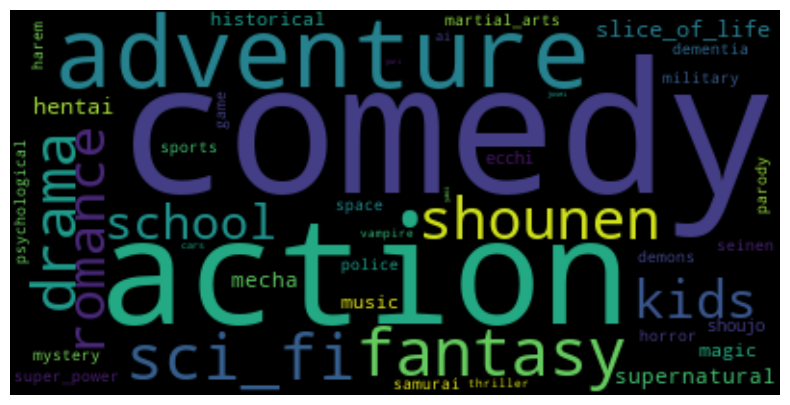

In [41]:
from wordcloud import WordCloud

genres_cleaned = sploded_genre_df.str.replace('Slice of Life', 'Slice_of_Life', case=False, regex=False)
genres_cleaned = genres_cleaned.str.replace('Super Power', 'Super_Power', case=False, regex=False)
genres_cleaned = genres_cleaned.str.replace('Martial Arts', 'Martial_Arts', case=False, regex=False)
genres_cleaned = genres_cleaned.str.replace('Sci-Fi', 'Sci_Fi', case=False, regex=False)
genres_cleaned_2 = genres_cleaned.str.lower().str.strip().str.replace(r'[^\w\s]', '', regex=True)
genres_content = ' '.join(genres_cleaned_2)

wordcloud = WordCloud(collocations=False).generate(genres_content)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
